In [1]:
#@title Imports
# !pip install -q symbulate
from symbulate import *

# !pip install tabulate
from tabulate import tabulate

import matplotlib.pyplot as plt
%matplotlib inline

# Handout 05: Uniformly Most Powerful Tests

## Exer 5.1

### Test A: Reject $H_0:\lambda = 2$ if $X > 1.5$

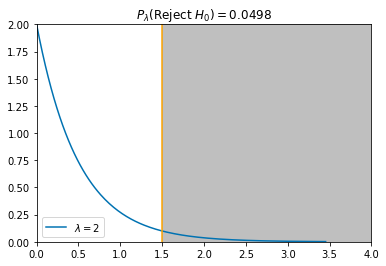

In [2]:
lam = 2
c0 = 1.5

power = 1 - Exponential(rate = lam).cdf(c0)

Exponential(rate = lam).plot()
plt.xlim(0, 4);
plt.ylim(0, 2);
plt.legend([r"$\lambda = %s$" % lam])
plt.axvline(x = c0, color = 'orange');

plt.axvspan(c0, 10, alpha = 0.5, color = 'gray');
plt.title(r"$P_\lambda($Reject $H_0)=%s$" % round(power, 4));

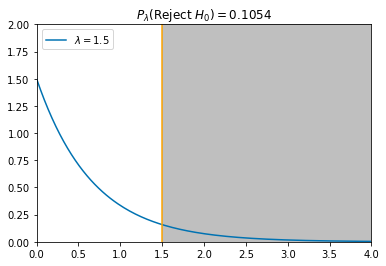

In [3]:
lam = 1.5
c0 = 1.5

power = 1 - Exponential(rate = lam).cdf(c0)

Exponential(rate = lam).plot()
plt.xlim(0, 4);
plt.ylim(0, 2);
plt.legend([r"$\lambda = %s$" % lam])
plt.axvline(x = c0, color = 'orange');

plt.axvspan(c0, 10, alpha = 0.5, color = 'gray');
plt.title(r"$P_\lambda($Reject $H_0)=%s$" % round(power, 4));

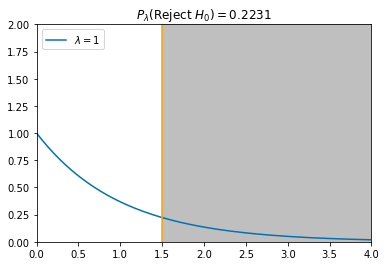

In [4]:
lam = 1
c0 = 1.5

power = 1 - Exponential(rate = lam).cdf(c0)

Exponential(rate = lam).plot()
plt.xlim(0, 4);
plt.ylim(0, 2);
plt.legend([r"$\lambda = %s$" % lam])
plt.axvline(x = c0, color = 'orange');

plt.axvspan(c0, 10, alpha = 0.5, color = 'gray');
plt.title(r"$P_\lambda($Reject $H_0)=%s$" % round(power, 4));

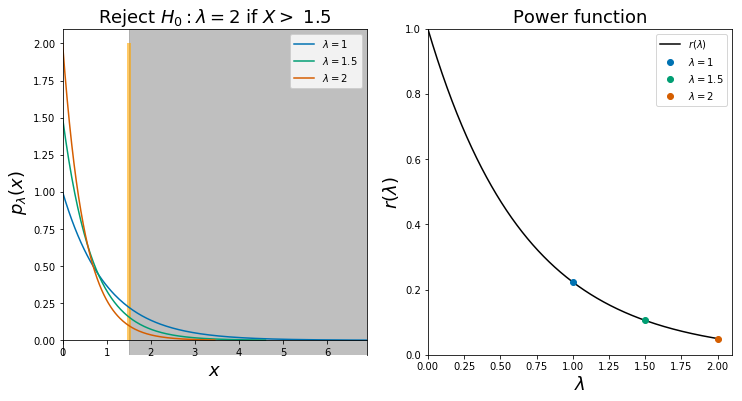

In [5]:
lam1 = [1, 1.5, 2]
c0 = 1.5
lam0 = 2

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_xlim(0, 2)

axes[1].set_ylim(0, 1)
axes[1].set_xlim(0, lam0 + 0.1)
lams = np.linspace(0.001, lam0, 1000)
rs = [1 - Exponential(rate = lam).cdf(c0) for lam in lams]
axes[1].plot(lams, rs, "k-")

for lam in lam1:
    Exponential(rate = lam).plot(ax=axes[0])
    axes[1].plot([lam], 1 - Exponential(rate = lam).cdf(c0), 'o')

axes[0].vlines(c0, 0, max(lam1), color = 'orange', alpha=.6, linewidth=4)
axes[0].axvspan(c0, 10, alpha = 0.5, color = 'gray');

axes[0].legend(["$\lambda=%s$" % lam for lam in lam1])
axes[1].legend(["$r(\lambda)$"] + ["$\lambda=%s$" % lam for lam in lam1])

axes[0].set_xlabel("$x$", fontsize=18)
axes[0].set_ylabel(r"$p_\lambda(x)$", fontsize=18)
axes[1].set_xlabel(r"$\lambda$", fontsize=18)
axes[1].set_ylabel(r"$r(\lambda)$", fontsize=18);

axes[0].set_title(r"Reject $H_0:\lambda =%s$" % lam0 +
                  r" if $X>$ %s" % c0, fontsize=18);
axes[1].set_title(r"Power function", fontsize=18);

### Test B: Reject $H_0:\lambda = 2$ if $X > 2$

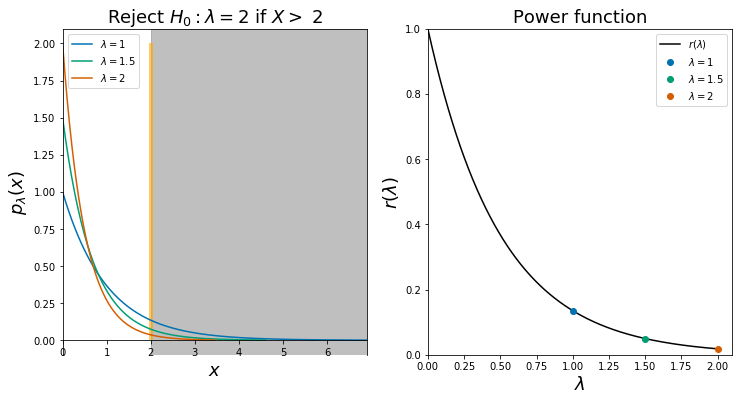

In [6]:
lam1 = [1, 1.5, 2]
c0 = 2
lam0 = 2

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_xlim(0, 2)

axes[1].set_ylim(0, 1)
axes[1].set_xlim(0, lam0 + 0.1)
lams = np.linspace(0.001, lam0, 1000)
rs = [1 - Exponential(rate = lam).cdf(c0) for lam in lams]
axes[1].plot(lams, rs, "k-")

for lam in lam1:
    Exponential(rate = lam).plot(ax=axes[0])
    axes[1].plot([lam], 1 - Exponential(rate = lam).cdf(c0), 'o')

axes[0].vlines(c0, 0, max(lam1), color = 'orange', alpha=.6, linewidth=4)
axes[0].axvspan(c0, 10, alpha = 0.5, color = 'gray');

axes[0].legend(["$\lambda=%s$" % lam for lam in lam1])
axes[1].legend(["$r(\lambda)$"] + ["$\lambda=%s$" % lam for lam in lam1])

axes[0].set_xlabel("$x$", fontsize=18)
axes[0].set_ylabel(r"$p_\lambda(x)$", fontsize=18)
axes[1].set_xlabel(r"$\lambda$", fontsize=18)
axes[1].set_ylabel(r"$r(\lambda)$", fontsize=18);

axes[0].set_title(r"Reject $H_0:\lambda =%s$" % lam0 +
                  r" if $X>$ %s" % c0, fontsize=18);
axes[1].set_title(r"Power function", fontsize=18);

### Comparison of Test A and Test B Power functions

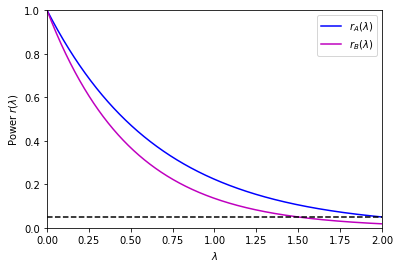

In [7]:
cA = 1.5
cB = 2
lam0 = 2

lams = np.linspace(0.001, lam0, 1000)
rA = [1 - Exponential(rate = lam).cdf(cA) for lam in lams]
rB = [1 - Exponential(rate = lam).cdf(cB) for lam in lams]
plt.plot(lams, rA, "b-")
plt.plot(lams, rB, "m-")
plt.xlim(0, lam0)
plt.ylim(0, 1)
plt.axhline(y = 0.05, color = "black", linestyle = "dashed");
plt.xlabel(r"$\lambda$")
plt.ylabel(r"Power $r(\lambda)$")
plt.legend(["$r_A(\lambda)$", "$r_B(\lambda)$"]);

## Exer 5.2

In [8]:
n = 5
theta0 = 0.250

xs = range(0, n + 1)

### $H_1: \theta = 0.333$

In [9]:
theta1 = 0.333

print(tabulate({'x': xs,
                'p_0(x)': [Binomial(n, theta0).pmf(x) for x in xs],
                'p_1(x)': [Binomial(n, theta1).pmf(x) for x in xs],
                'T(x) = p_1(x) / p_0(x)': [Binomial(n, theta1).pmf(x) / Binomial(n, theta0).pmf(x) for x in xs]},
               headers = 'keys', floatfmt=".4f"))

  x    p_0(x)    p_1(x)    T(x) = p_1(x) / p_0(x)
---  --------  --------  ------------------------
  0    0.2373    0.1320                    0.5563
  1    0.3955    0.3295                    0.8332
  2    0.2637    0.3291                    1.2480
  3    0.0879    0.1643                    1.8691
  4    0.0146    0.0410                    2.7995
  5    0.0010    0.0041                    4.1930


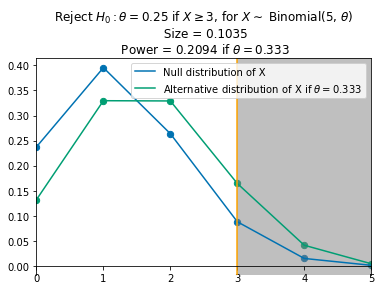

In [10]:
c0 = 3
size = 1 - Binomial(n, theta0).cdf(c0 - 1)
power = 1 - Binomial(n, theta1).cdf(c0 - 1)

Binomial(n, theta0).plot()
Binomial(n, theta1).plot()
plt.legend(['Null distribution of X',
            r'Alternative distribution of X if $\theta=%s$' % theta1]);
plt.axvline(x = c0, color = 'orange');
plt.axvspan(c0, n, alpha = 0.5, color = 'gray');
plt.title(r"Reject $H_0:\theta =%s$" % theta0 +
          r" if $X\geq %s$" % c0 +
          r", for $X\sim$ Binomial(%s, $\theta$)" % n + 
          "\n Size = %s" % round(size, 4) +
          "\n Power = %s" % round(power, 4) +
          r" if $\theta = %s$" % theta1);

### $H_1: \theta = 0.400$

In [11]:
theta1 = 0.400

print(tabulate({'x': xs,
                'p_0(x)': [Binomial(n, theta0).pmf(x) for x in xs],
                'p_1(x)': [Binomial(n, theta1).pmf(x) for x in xs],
                'T(x) = p_1(x) / p_0(x)': [Binomial(n, theta1).pmf(x) / Binomial(n, theta0).pmf(x) for x in xs]},
               headers = 'keys', floatfmt=".4f"))

  x    p_0(x)    p_1(x)    T(x) = p_1(x) / p_0(x)
---  --------  --------  ------------------------
  0    0.2373    0.0778                    0.3277
  1    0.3955    0.2592                    0.6554
  2    0.2637    0.3456                    1.3107
  3    0.0879    0.2304                    2.6214
  4    0.0146    0.0768                    5.2429
  5    0.0010    0.0102                   10.4858


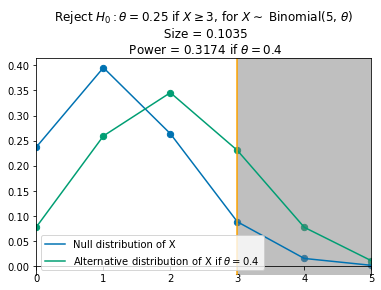

In [12]:
c0 = 3
size = 1 - Binomial(n, theta0).cdf(c0 - 1)
power = 1 - Binomial(n, theta1).cdf(c0 - 1)

Binomial(n, theta0).plot()
Binomial(n, theta1).plot()
plt.legend(['Null distribution of X',
            r'Alternative distribution of X if $\theta=%s$' % theta1]);
plt.axvline(x = c0, color = 'orange');
plt.axvspan(c0, n, alpha = 0.5, color = 'gray');
plt.title(r"Reject $H_0:\theta =%s$" % theta0 +
          r" if $X\geq %s$" % c0 +
          r", for $X\sim$ Binomial(%s, $\theta$)" % n + 
          "\n Size = %s" % round(size, 4) +
          "\n Power = %s" % round(power, 4) +
          r" if $\theta = %s$" % theta1);

### $H_1: \theta = 0.3$

In [13]:
theta1 = 0.300

print(tabulate({'x': xs,
                'p_0(x)': [Binomial(n, theta0).pmf(x) for x in xs],
                'p_1(x)': [Binomial(n, theta1).pmf(x) for x in xs],
                'T(x) = p_1(x) / p_0(x)': [Binomial(n, theta1).pmf(x) / Binomial(n, theta0).pmf(x) for x in xs]},
               headers = 'keys', floatfmt=".4f"))

  x    p_0(x)    p_1(x)    T(x) = p_1(x) / p_0(x)
---  --------  --------  ------------------------
  0    0.2373    0.1681                    0.7082
  1    0.3955    0.3601                    0.9106
  2    0.2637    0.3087                    1.1708
  3    0.0879    0.1323                    1.5053
  4    0.0146    0.0283                    1.9354
  5    0.0010    0.0024                    2.4883


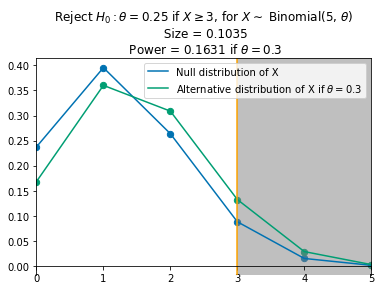

In [14]:
c0 = 3
size = 1 - Binomial(n, theta0).cdf(c0 - 1)
power = 1 - Binomial(n, theta1).cdf(c0 - 1)

Binomial(n, theta0).plot()
Binomial(n, theta1).plot()
plt.legend(['Null distribution of X',
            r'Alternative distribution of X if $\theta=%s$' % theta1]);
plt.axvline(x = c0, color = 'orange');
plt.axvspan(c0, n, alpha = 0.5, color = 'gray');
plt.title(r"Reject $H_0:\theta =%s$" % theta0 +
          r" if $X\geq %s$" % c0 +
          r", for $X\sim$ Binomial(%s, $\theta$)" % n + 
          "\n Size = %s" % round(size, 4) +
          "\n Power = %s" % round(power, 4) +
          r" if $\theta = %s$" % theta1);

### Power function

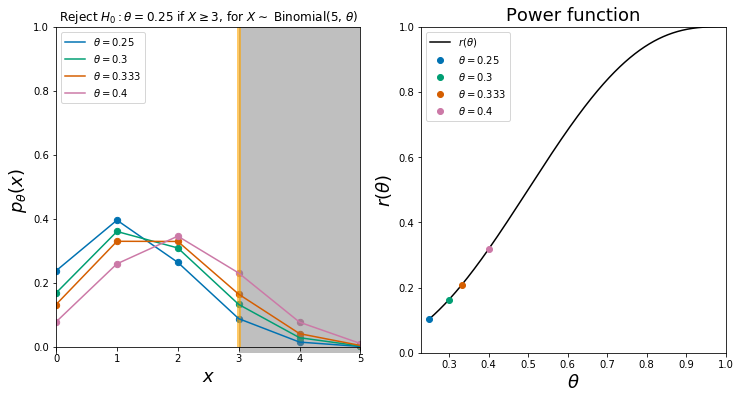

In [15]:
theta1 = [0.25, 0.3, 0.333, 0.4]
c0 = 3
theta0 = 0.25

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_xlim(0, n)

axes[1].set_ylim(0, 1)
axes[1].set_xlim(theta0 - 0.02, 1)
thetas = np.linspace(theta0, 1, 1000)
rs = [1 - Binomial(n, theta).cdf(c0 - 1) for theta in thetas]
axes[1].plot(thetas, rs, "k-")

for theta in theta1:
    Binomial(n, theta).plot(ax=axes[0])
    axes[1].plot([theta],
                 1 - Binomial(n, theta).cdf(c0 - 1),
                 'o')

axes[0].vlines(c0, 0, 1, color = 'orange', alpha=.6, linewidth=4)
axes[0].axvspan(c0, n, alpha = 0.5, color = 'gray');

axes[0].legend([r"$\theta=%s$" % theta for theta in theta1])
axes[1].legend([r"$r(\theta)$"] + [r"$\theta=%s$" % theta for theta in theta1])

axes[0].set_xlabel("$x$", fontsize=18)
axes[0].set_ylabel(r"$p_\theta(x)$", fontsize=18)
axes[1].set_xlabel(r"$\theta$", fontsize=18)
axes[1].set_ylabel(r"$r(\theta)$", fontsize=18);

axes[0].set_title(r"Reject $H_0:\theta =%s$" % theta0 +
          r" if $X\geq %s$" % c0 +
          r", for $X\sim$ Binomial(%s, $\theta$)" % n);
axes[1].set_title(r"Power function", fontsize=18);

## Exer 5.3

### $H_1: \mu = 97.5$

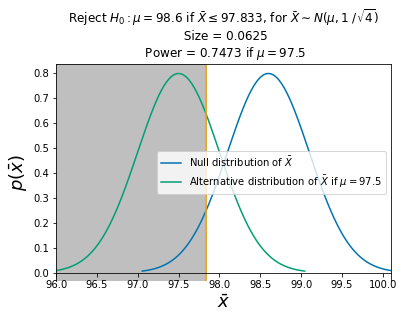

In [16]:
n = 4
sigma = 1

mu0 = 98.6
mu1 = 97.5

alpha0 = 0.0625
c0 = Normal(mu0, sigma / sqrt(n)).quantile(alpha0)

size = Normal(mu0, sigma / sqrt(n)).cdf(c0)
power = Normal(mu1, sigma / sqrt(n)).cdf(c0)

Normal(mu0, sigma / sqrt(n)).plot()
Normal(mu1, sigma / sqrt(n)).plot()

plt.xlim(mu1 - 3 * sigma / sqrt(n), mu0 + 3 * sigma / sqrt(n))
plt.legend([r'Null distribution of $\bar{X}$',
            r'Alternative distribution of $\bar{X}$ if $\mu=%s$' % mu1]);
plt.axvline(x = c0, color = 'orange');
plt.axvspan(90, c0, alpha = 0.5, color = 'gray');
plt.xlabel(r"$\bar{x}$", fontsize=18)
plt.ylabel(r"$p(\bar{x})$", fontsize=18);
plt.title(r"Reject $H_0:\mu =%s$" % mu0 +
          r" if $\bar{X}\leq %s$" % round(c0, 3) +
          r", for $\bar{X}\sim N(\mu, %s$" % sigma +
          r" $/ \sqrt{%s}$)" % n + 
          "\n Size = %s" % round(size, 4) +
          "\n Power = %s" % round(power, 4) +
          r" if $\mu = %s$" % mu1);

### $H_1: \mu = 98.0$

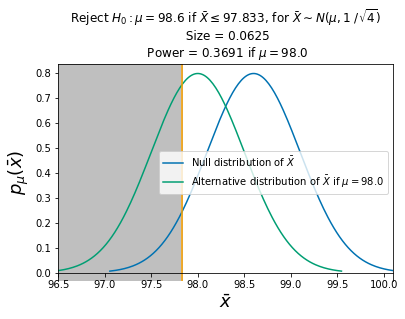

In [17]:
n = 4
sigma = 1

mu0 = 98.6
mu1 = 98.0

alpha0 = 0.0625
c0 = Normal(mu0, sigma / sqrt(n)).quantile(alpha0)

size = Normal(mu0, sigma / sqrt(n)).cdf(c0)
power = Normal(mu1, sigma / sqrt(n)).cdf(c0)

Normal(mu0, sigma / sqrt(n)).plot()
Normal(mu1, sigma / sqrt(n)).plot()

plt.xlim(mu1 - 3 * sigma / sqrt(n), mu0 + 3 * sigma / sqrt(n))
plt.legend([r'Null distribution of $\bar{X}$',
            r'Alternative distribution of $\bar{X}$ if $\mu=%s$' % mu1]);
plt.axvline(x = c0, color = 'orange');
plt.axvspan(90, c0, alpha = 0.5, color = 'gray');
plt.xlabel(r"$\bar{x}$", fontsize=18)
plt.ylabel(r"$p_\mu(\bar{x})$", fontsize=18);
plt.title(r"Reject $H_0:\mu =%s$" % mu0 +
          r" if $\bar{X}\leq %s$" % round(c0, 3) +
          r", for $\bar{X}\sim N(\mu, %s$" % sigma +
          r" $/ \sqrt{%s}$)" % n + 
          "\n Size = %s" % round(size, 4) +
          "\n Power = %s" % round(power, 4) +
          r" if $\mu = %s$" % mu1);

### Power function

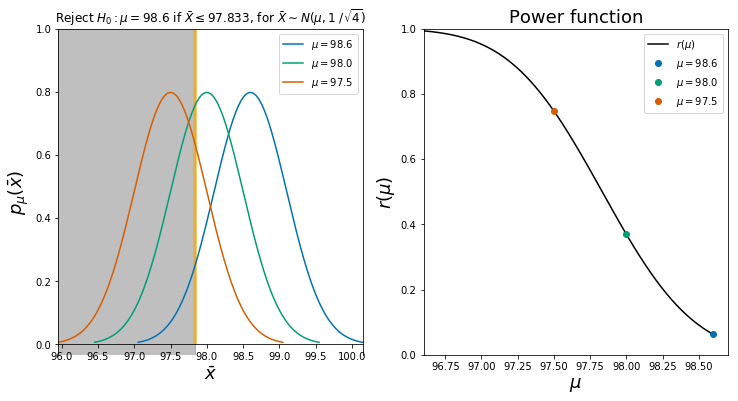

In [18]:
n = 4
sigma = 1

mu0 = 98.6
mu1 = [98.6, 98.0, 97.5]

alpha0 = 0.0625
c0 = Normal(mu0, sigma / sqrt(n)).quantile(alpha0)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_xlim(min(mu1) - 3 * sigma / sqrt(n),
                 max(mu1) + 3 * sigma / sqrt(n))

axes[1].set_ylim(0, 1)
axes[1].set_xlim(mu0 - 4 * sigma / sqrt(n), mu0 + 0.1)
mus = np.linspace(mu0 - 4 * sigma / sqrt(n), mu0, 1000)
rs = [Normal(mu, sigma / sqrt(n)).cdf(c0) for mu in mus]
axes[1].plot(mus, rs, "k-")

for mu in mu1:
    Normal(mu, sigma / sqrt(n)).plot(ax=axes[0])
    axes[1].plot([mu],
                 Normal(mu, sigma / sqrt(n)).cdf(c0),
                 'o')

axes[0].vlines(c0, 0, 1, color = 'orange', alpha=.6, linewidth=4)
axes[0].axvspan(c0, n, alpha = 0.5, color = 'gray');

axes[0].legend([r"$\mu=%s$" % mu for mu in mu1])
axes[1].legend([r"$r(\mu)$"] + [r"$\mu=%s$" % mu for mu in mu1])

axes[0].set_xlabel(r"$\bar{x}$", fontsize=18)
axes[0].set_ylabel(r"$p_\mu(\bar{x})$", fontsize=18)
axes[1].set_xlabel(r"$\mu$", fontsize=18)
axes[1].set_ylabel(r"$r(\mu)$", fontsize=18);

axes[0].set_title(r"Reject $H_0:\mu =%s$" % round(mu0, 3) +
          r" if $\bar{X}\leq %s$" % round(c0, 3) +
          r", for $\bar{X}\sim N(\mu, %s$" % sigma +
          r" $/ \sqrt{%s}$)" % n );
axes[1].set_title(r"Power function", fontsize=18);

## Exer 5.6

### Test A: Reject $H_0:\lambda \ge 2$ if $X > 1.5$

Type I Error probability when $\lambda = 3$

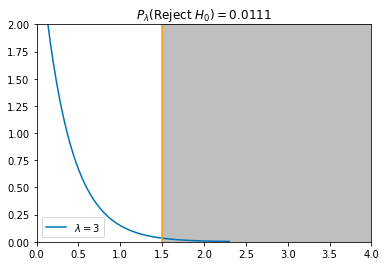

In [19]:
lam0 = 2
lam = 3
c0 = 1.5

power = 1 - Exponential(rate = lam).cdf(c0)

Exponential(rate = lam).plot()
plt.xlim(0, 4);
plt.ylim(0, 2);
plt.legend([r"$\lambda = %s$" % lam])
plt.axvline(x = c0, color = 'orange');

plt.axvspan(c0, 10, alpha = 0.5, color = 'gray');
plt.title(r"$P_\lambda($Reject $H_0)=%s$" % round(power, 4));

### Test A Power function

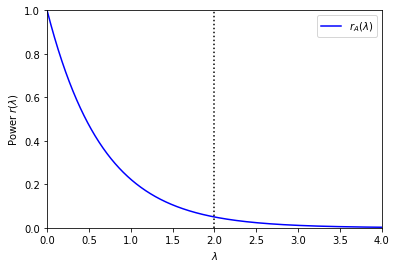

In [20]:
lam0 = 2

lams = np.linspace(0.001, 4, 1000)
rA = [1 - Exponential(rate = lam).cdf(cA) for lam in lams]
plt.plot(lams, rA, "b-")
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.axvline(x = lam0, color = 'black', linestyle = "dotted");
plt.xlabel(r"$\lambda$")
plt.ylabel(r"Power $r(\lambda)$")
plt.legend(["$r_A(\lambda)$"]);

### Test A: Reject $H_0:\lambda \ge 2$ if $X > 2$

Type I Error probability when $\lambda = 3$

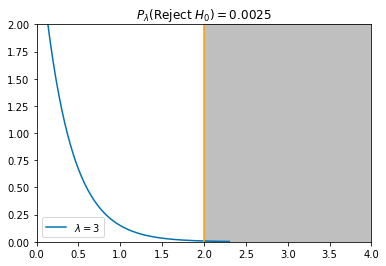

In [21]:
lam0 = 2
lam = 3
c0 = 2

power = 1 - Exponential(rate = lam).cdf(c0)

Exponential(rate = lam).plot()
plt.xlim(0, 4);
plt.ylim(0, 2);
plt.legend([r"$\lambda = %s$" % lam])
plt.axvline(x = c0, color = 'orange');

plt.axvspan(c0, 10, alpha = 0.5, color = 'gray');
plt.title(r"$P_\lambda($Reject $H_0)=%s$" % round(power, 4));

### Test B Power Function

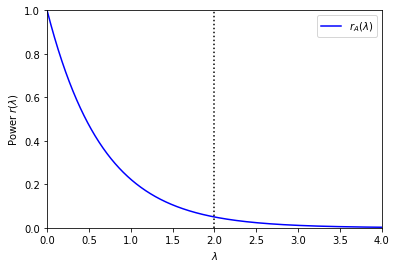

In [22]:
lam0 = 2

lams = np.linspace(0.001, 4, 1000)
rA = [1 - Exponential(rate = lam).cdf(cA) for lam in lams]
plt.plot(lams, rA, "b-")
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.axvline(x = lam0, color = 'black', linestyle = "dotted");
plt.xlabel(r"$\lambda$")
plt.ylabel(r"Power $r(\lambda)$")
plt.legend(["$r_A(\lambda)$"]);

### Comparison of power functions; horizontal red line for level $\alpha_0 = 0.05$

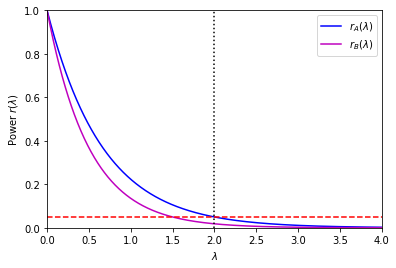

In [23]:
cA = 1.5
cB = 2
lam0 = 2

lams = np.linspace(0.001, 4, 1000)
rA = [1 - Exponential(rate = lam).cdf(cA) for lam in lams]
rB = [1 - Exponential(rate = lam).cdf(cB) for lam in lams]
plt.plot(lams, rA, "b-")
plt.plot(lams, rB, "m-")
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.axvline(x = lam0, color = 'black', linestyle = "dotted");
plt.axhline(y = 0.05, color = "red", linestyle = "dashed");
plt.xlabel(r"$\lambda$")
plt.ylabel(r"Power $r(\lambda)$")
plt.legend(["$r_A(\lambda)$", "$r_B(\lambda)$"]);

### Comparison of power functions; horizontal red line for level $\alpha_0 = 0.02$

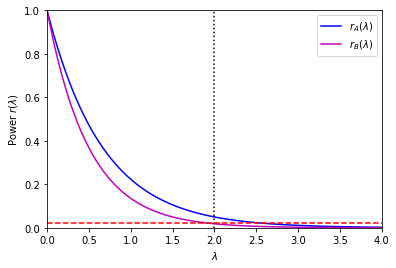

In [24]:
cA = 1.5
cB = 2
lam0 = 2

lams = np.linspace(0.001, 4, 1000)
rA = [1 - Exponential(rate = lam).cdf(cA) for lam in lams]
rB = [1 - Exponential(rate = lam).cdf(cB) for lam in lams]
plt.plot(lams, rA, "b-")
plt.plot(lams, rB, "m-")
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.axvline(x = lam0, color = 'black', linestyle = "dotted");
plt.axhline(y = 0.02, color = "red", linestyle = "dashed");
plt.xlabel(r"$\lambda$")
plt.ylabel(r"Power $r(\lambda)$")
plt.legend(["$r_A(\lambda)$", "$r_B(\lambda)$"]);

## Exer 5.7

### $H_0: \mu = 99.0$

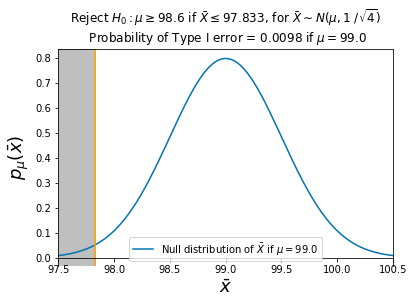

In [25]:
n = 4
sigma = 1

mu0 = 98.6
mu = 99.0

alpha0 = 0.0625
c0 = Normal(mu0, sigma / sqrt(n)).quantile(alpha0)

probTypeI = Normal(mu, sigma / sqrt(n)).cdf(c0)

Normal(mu, sigma / sqrt(n)).plot()

plt.xlim(mu - 3 * sigma / sqrt(n), mu + 3 * sigma / sqrt(n))
plt.legend([r'Null distribution of $\bar{X}$ if $\mu=%s$' % mu]);
plt.axvline(x = c0, color = 'orange');
plt.axvspan(90, c0, alpha = 0.5, color = 'gray');
plt.xlabel(r"$\bar{x}$", fontsize=18)
plt.ylabel(r"$p_\mu(\bar{x})$", fontsize=18);
plt.title(r"Reject $H_0:\mu \geq%s$" % mu0 +
          r" if $\bar{X}\leq %s$" % round(c0, 3) +
          r", for $\bar{X}\sim N(\mu, %s$" % sigma +
          r" $/ \sqrt{%s}$)" % n + 
          "\n Probability of Type I error = %s" % round(probTypeI, 4) +
          r" if $\mu = %s$" % mu);

### Power function

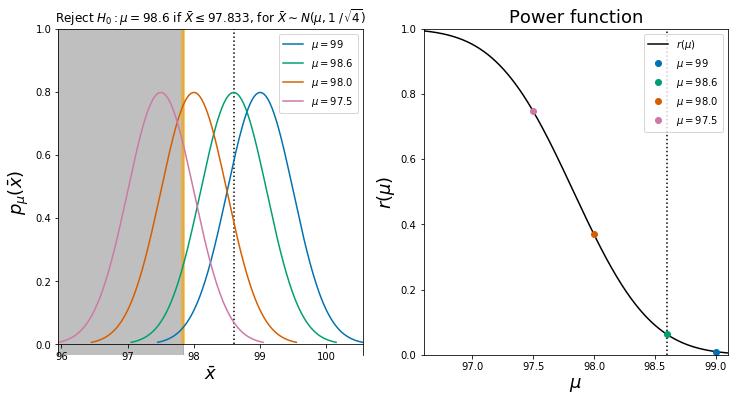

In [26]:
n = 4
sigma = 1

mu0 = 98.6
mu1 = [99, 98.6, 98.0, 97.5]

alpha0 = 0.0625
c0 = Normal(mu0, sigma / sqrt(n)).quantile(alpha0)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_xlim(min(mu1) - 3 * sigma / sqrt(n),
                 max(mu1) + 3 * sigma / sqrt(n))

axes[1].set_ylim(0, 1)
axes[1].set_xlim(mu0 - 4 * sigma / sqrt(n), max(mu1) + 0.1)
mus = np.linspace(mu0 - 4 * sigma / sqrt(n), max(mu1) + 0.1, 1000)
rs = [Normal(mu, sigma / sqrt(n)).cdf(c0) for mu in mus]
axes[1].plot(mus, rs, "k-")

for mu in mu1:
    Normal(mu, sigma / sqrt(n)).plot(ax=axes[0])
    axes[1].plot([mu],
                 Normal(mu, sigma / sqrt(n)).cdf(c0),
                 'o')

axes[0].vlines(c0, 0, 1, color = 'orange', alpha=.6, linewidth=4)
axes[0].vlines(mu0, 0, 1, color = 'black', linestyle="dotted")
axes[0].axvspan(c0, n, alpha = 0.5, color = 'gray');
axes[1].vlines(mu0, 0, 1, color = 'black', linestyle="dotted")


axes[0].legend([r"$\mu=%s$" % mu for mu in mu1])
axes[1].legend([r"$r(\mu)$"] + [r"$\mu=%s$" % mu for mu in mu1])

axes[0].set_xlabel(r"$\bar{x}$", fontsize=18)
axes[0].set_ylabel(r"$p_\mu(\bar{x})$", fontsize=18)
axes[1].set_xlabel(r"$\mu$", fontsize=18)
axes[1].set_ylabel(r"$r(\mu)$", fontsize=18);

axes[0].set_title(r"Reject $H_0:\mu =%s$" % round(mu0, 3) +
          r" if $\bar{X}\leq %s$" % round(c0, 3) +
          r", for $\bar{X}\sim N(\mu, %s$" % sigma +
          r" $/ \sqrt{%s}$)" % n );
axes[1].set_title(r"Power function", fontsize=18);